In [45]:
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np

In [46]:
path_img = "E:/YNU/5/OpenSourceGIS/Act_5/OnClass/呈贡10m分辨率裁剪子区域及呈贡20m分辨率/chenggong_utm48_20m.tif"

In [47]:
dset_img = gdal.Open(path_img)
img_arry = dset_img.ReadAsArray()
img_arry = img_arry.transpose(1, 2, 0)
img_arry.shape

(1613, 1499, 6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7054].


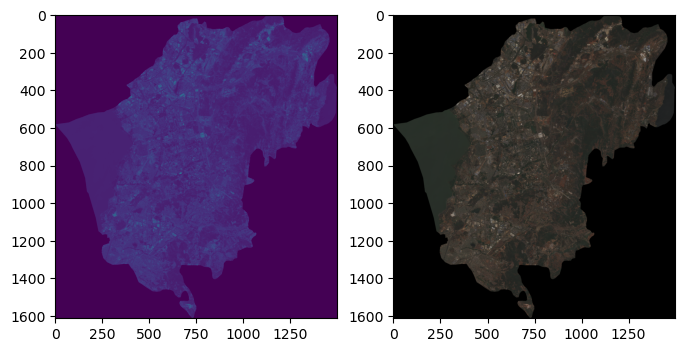

In [48]:
## 返回反射率（为了节省空间，反射率都乘以了10000）
img_arry[1000:1200, 1000:1200, 1]
img_arry = img_arry/10000
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
ax[0].imshow(img_arry[:, :, 0])
ax[1].imshow(img_arry[:,:,0:3])

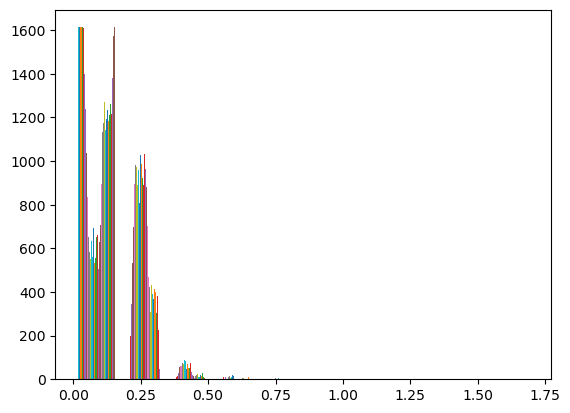

In [49]:
band_1 = img_arry[:, :, 0]
## 直方图统计
_ = plt.hist(band_1)

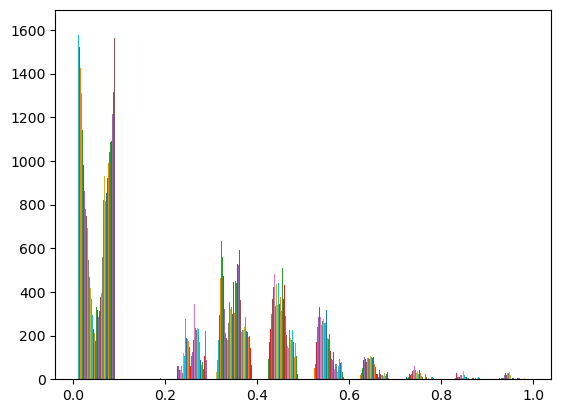

In [50]:
## 直方图拉伸
min_dn, max_dn = 0, 0.5
band_1_ = np.clip(band_1, min_dn, max_dn)
band_1_ = (band_1_ - min_dn) / (max_dn - min_dn) # 归一化
## 直方图统计
_ = plt.hist(band_1_)

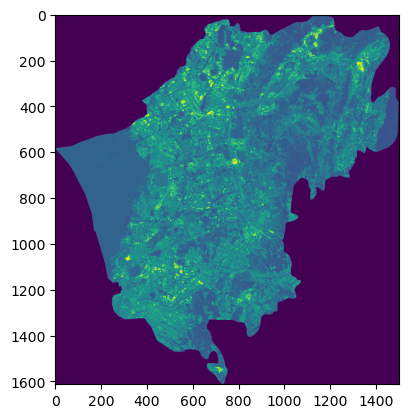

In [51]:
plt.imshow(band_1_)

In [52]:
## 自动拉伸
min_dn, max_dn = np.percentile(band_1, 5), np.percentile(band_1, 95)  # 计算栅格数据的最小值和最大值
print(min_dn, max_dn)

0.0 0.294


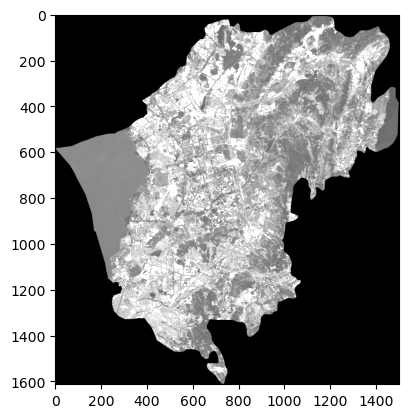

In [53]:
plt.imshow(band_1, vmax=max_dn, vmin=min_dn, cmap='gray') # 显示波段1的图像

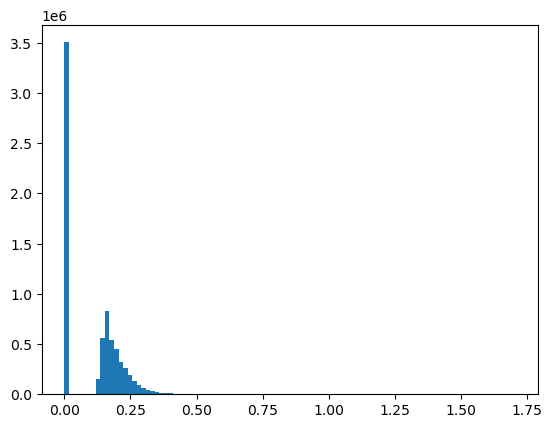

In [54]:
band_color = img_arry[:, :, 0:3].copy() # 取出三波段数据
badn_color_ = band_color.flatten() # 将三波段数据展平为一维数组
_ = plt.hist(badn_color_, bins=100) # 绘制直方图

In [55]:
## 自动确定阈值
min_dn, max_dn = np.percentile(badn_color_, 5), np.percentile(badn_color_, 95)
print(min_dn, max_dn)

0.0 0.2652


In [56]:
band_color_nor = np.clip(band_color, min_dn, max_dn)
band_color_nor = (band_color_nor - min_dn) / (max_dn - min_dn) # 归一化

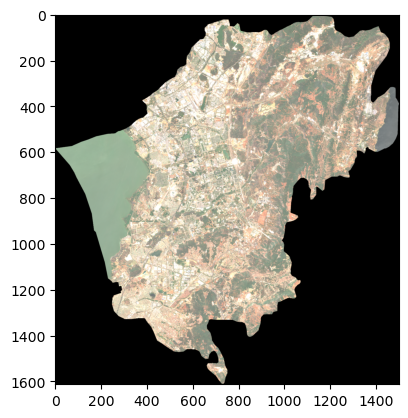

In [57]:
plt.imshow(band_color_nor) # 显示栅格数据(假彩色合成)

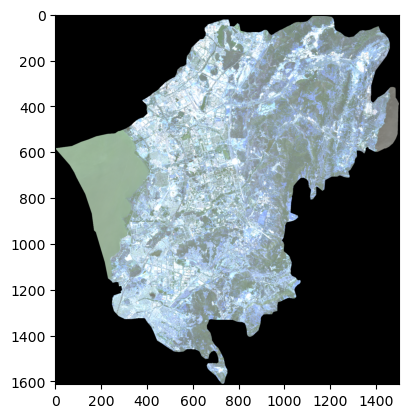

In [ ]:
band_color_nor_ = np.stack([band_color_nor[:, :, 2], band_color_nor[:, :, 1], band_color_nor[:, :, 0]], axis=2)  # 转换为RGB顺序
plt.imshow(band_color_nor_) # 显示栅格数据(真彩色合成)